In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_score
from itertools import product
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA, KernelPCA

import psutil
import time

#Setting the plot parameters for standardized graphs.
plt.rcParams["figure.figsize"] = (15, 7)
plt.style.use("ggplot")

In [2]:
#Read the data. 'train_data includes features and label.'
train_data = pd.read_csv("Dataset.csv")
#X = pd.read_csv("X_train.csv", header=None)
X = np.array(pd.read_csv("X_train.csv", header=None))
label = pd.read_csv("y_train.csv", header=None)
#label = np.array(pd.read_csv("y_train.csv", header=None))

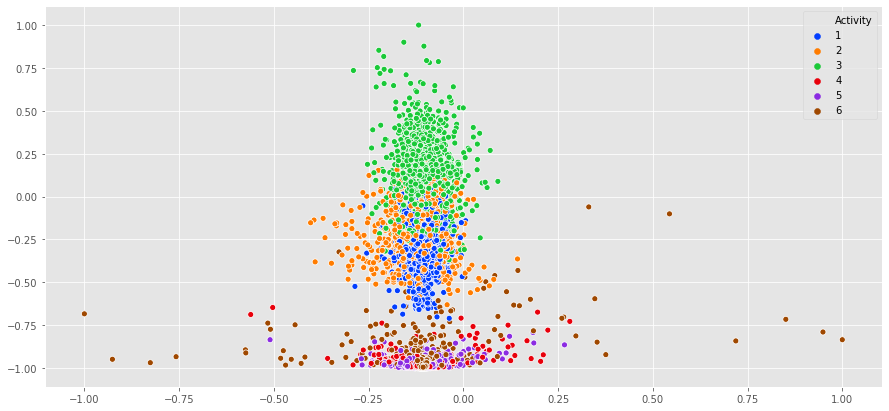

In [3]:
#Scatter plot of two features to see how data is spread. Data looks very dense and overlapping.
sns.scatterplot(X[:,2], X[:,3], hue=train_data['Activity'], palette='bright')

In [4]:
#Reference key for labels.
KeyRef = {"1":"WALKING", "2":"WALKING_UPSTAIRS","3":"WALKING_DOWNSTAIRS","4":"SITTING","5":"STANDING","6":"LAYING"}

In [5]:
#Check activity sample distribution.
train_data[('Activity')].groupby(train_data['Activity']).count()

Activity
1    1226
2    1073
3     986
4    1286
5    1374
6    1407
Name: Activity, dtype: int64

In [6]:
#Have a look on data details/feature.
train_data.describe()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",Activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.00000,7352.000000,7352.000000
mean,0.274487,-0.017695,-0.109143,-0.605435,-0.510936,-0.604750,-0.630510,-0.526905,-0.606157,-0.468601,...,-0.307007,-0.625299,0.008678,0.002189,0.008728,-0.005982,-0.489550,0.05859,-0.056516,3.643362
std,0.070264,0.040811,0.056643,0.448736,0.502644,0.418695,0.424065,0.485945,0.414119,0.544549,...,0.321008,0.307582,0.336782,0.448308,0.608299,0.477979,0.511802,0.29748,0.279122,1.744802
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995000,-1.000000,-0.977000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,1.000000
25%,0.263000,-0.024900,-0.121000,-0.993000,-0.978000,-0.980000,-0.994000,-0.978000,-0.980000,-0.936000,...,-0.543000,-0.846000,-0.122000,-0.290000,-0.482000,-0.376000,-0.812000,-0.01790,-0.143250,2.000000
50%,0.277000,-0.017200,-0.109000,-0.946000,-0.852000,-0.859000,-0.951000,-0.857500,-0.857000,-0.882000,...,-0.344000,-0.712000,0.009510,0.008945,0.008735,-0.000367,-0.709000,0.18200,0.003180,4.000000
75%,0.288000,-0.010800,-0.097800,-0.243000,-0.034200,-0.262750,-0.293000,-0.066675,-0.265750,-0.017100,...,-0.127000,-0.504000,0.151000,0.293000,0.506000,0.359000,-0.509000,0.24800,0.108000,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.916000,1.000000,1.000000,0.968000,1.000000,1.000000,...,0.990000,0.957000,1.000000,1.000000,0.999000,0.996000,1.000000,0.47800,1.000000,6.000000


In [7]:
#Check null values
train_data.isnull().groupby(train_data['Activity']).sum()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",Activity
Activity,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#Print any features with null values
nulls = train_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0]>0:print(index, row[0])    

In [9]:
#Study different acitivity sample data differences. MEan and variance selected.
train_data.groupby('Activity').agg(['mean','var'])

1 tBodyAcc-mean()-X           2 tBodyAcc-mean()-Y            \
                        mean       var                mean       var   
Activity                                                               
1                   0.276259  0.002536           -0.017767  0.000436   
2                   0.261925  0.006090           -0.026648  0.001372   
3                   0.288170  0.009044           -0.016368  0.000732   
4                   0.273450  0.001764           -0.012142  0.001050   
5                   0.279298  0.000404           -0.016124  0.000319   
6                   0.269187  0.010310           -0.018345  0.005405   

         3 tBodyAcc-mean()-Z           4 tBodyAcc-std()-X            \
                        mean       var               mean       var   
Activity                                                              
1                  -0.108892  0.001052          -0.312640  0.020869   
2                  -0.120423  0.003625          -0.221069  0.023843   
3                  -0.105860  0.002566           0.139856  0.049337   
4                  -0.106576  0.002054          -0.983440  0.001042   
5                  -0.107327  0.001273          -0.985346  0.000523   
6                  -0.107178  0.008057          -0.959476  0.006196   

         5 tBodyAcc-std()-Y            ...  \
                       mean       var  ...   
Activity                               ...   
1                 -0.020279  0.031568  ...   
2                 -0.000344  0.040554  ...   
3                  0.079190  0.059430  ...   
4                 -0.936213  0.016919  ...   
5                 -0.936012  0.006714  ...   
6                 -0.937598  0.021585  ...   

         557 angle(tBodyGyroMean,gravityMean)            \
                                         mean       var   
Activity                                                  
1                                    0.003166  0.440187   
2                                   -0.157001  0.704066   
3                                    0.184771  0.699071   
4                                    0.016716  0.112160   
5                                    0.002032  0.253655   
6                                    0.015829  0.131454   

         558 angle(tBodyGyroJerkMean,gravityMean)            \
                                             mean       var   
Activity                                                      
1                                       -0.015123  0.247023   
2                                        0.044776  0.296825   
3                                       -0.070529  0.283928   
4                                       -0.027981  0.121587   
5                                        0.012786  0.299791   
6                                        0.010288  0.144142   

         559 angle(X,gravityMean)           560 angle(Y,gravityMean)  \
                             mean       var                     mean   
Activity                                                               
1                       -0.757133  0.009726                 0.220452   
2                       -0.633297  0.014568                 0.282366   
3                       -0.778266  0.010312                 0.199282   
4                       -0.690820  0.048995                -0.003856   
5                       -0.773798  0.010601                 0.208306   
6                        0.517103  0.020833                -0.440826   

                   561 angle(Z,gravityMean)            
               var                     mean       var  
Activity                                               
1         0.003191                 0.067579  0.013064  
2         0.004783                 0.128400  0.021123  
3         0.003897                 0.058975  0.013579  
4         0.017897                -0.096152  0.026607  
5         0.004768                 0.041117  0.012894  
6         0.082499                -0.445714  0.122211  

[6 rows x 1122 columns]

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 562 entries, 1 tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1)
memory usage: 31.5 MB


<h3> Use the input data without Dimensionality reduction.

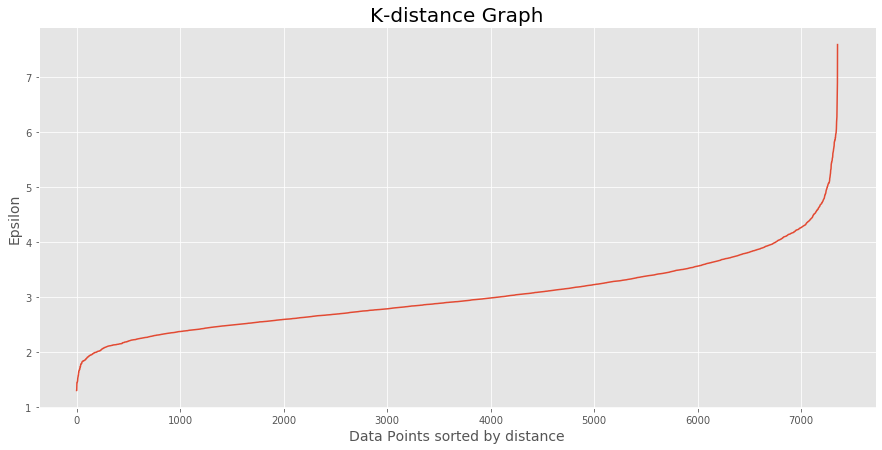

In [11]:
#Plot nearest neighbor grap for distance parameter setting.
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [12]:
#Set range of values using above graph. This to fond optimal DBSCAN parameters
eps_values = np.arange(3.6,6,0.5) # with normalization and PCA
min_samples = np.arange(4,16,2) # with normalization and PCA 20,40,2
DBSCAN_params = list(product(eps_values, min_samples))
train_data.drop(columns=['Activity'])

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.289,-0.02030,-0.133,-0.995,-0.98300,-0.9140,-0.995,-0.9830,-0.9240,-0.935,...,-0.0743,-0.2990,-0.710,-0.1130,0.03040,-0.4650,-0.0184,-0.841,0.180,-0.0586
1,0.278,-0.01640,-0.124,-0.998,-0.97500,-0.9600,-0.999,-0.9750,-0.9580,-0.943,...,0.1580,-0.5950,-0.861,0.0535,-0.00743,-0.7330,0.7040,-0.845,0.180,-0.0543
2,0.280,-0.01950,-0.113,-0.995,-0.96700,-0.9790,-0.997,-0.9640,-0.9770,-0.939,...,0.4150,-0.3910,-0.760,-0.1190,0.17800,0.1010,0.8090,-0.849,0.181,-0.0491
3,0.279,-0.02620,-0.123,-0.996,-0.98300,-0.9910,-0.997,-0.9830,-0.9890,-0.939,...,0.4050,-0.1170,-0.483,-0.0368,-0.01290,0.6400,-0.4850,-0.849,0.182,-0.0477
4,0.277,-0.01660,-0.115,-0.998,-0.98100,-0.9900,-0.998,-0.9800,-0.9900,-0.942,...,0.0878,-0.3510,-0.699,0.1230,0.12300,0.6940,-0.6160,-0.848,0.185,-0.0439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.300,-0.05720,-0.181,-0.195,0.03990,0.0771,-0.282,0.0436,0.0604,0.211,...,-0.0702,-0.5880,-0.880,-0.1900,0.83000,0.2070,-0.4260,-0.792,0.239,0.0498
7348,0.274,-0.00775,-0.147,-0.235,0.00482,0.0593,-0.323,-0.0295,0.0806,0.117,...,0.1650,-0.3910,-0.681,0.0649,0.87600,-0.8790,0.4000,-0.772,0.253,0.0501
7349,0.273,-0.01700,-0.045,-0.218,-0.10400,0.2750,-0.305,-0.0989,0.3330,0.044,...,0.1950,0.0251,-0.304,0.0528,-0.26700,0.8640,0.7010,-0.779,0.249,0.0408
7350,0.290,-0.01880,-0.158,-0.219,-0.11100,0.2690,-0.310,-0.0682,0.3190,0.102,...,0.0139,0.0639,-0.344,-0.1010,0.70100,0.9370,-0.5890,-0.785,0.246,0.0253


In [13]:
#THIS CAN TAKE ANYTHING FROM 30 MINUTES TO OVER ONE HOUR TO RUN!!! NOT NEEDED AS OPTIMAL PARAMETERS FOUND ALREADY.
#Run DBSCAN fit with multiple parameter sets to find optimal parameters for best most accurate output.
#Run timer to check computation time.
no_of_clusters = []
sil_score = []
print('PCU utilization:', psutil.cpu_percent(),'%')
print('Clusters created at each round. Looking for 6 with high silhouette score. Will take about 1800 to 3600s to run.')
start = time.time()

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(train_data)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    #print(DBS_clustering.labels_)
    #print(no_of_clusters)
    #print(p[0],p[1])
    #print('PCU utilization%:', psutil.cpu_percent())
    if len(np.unique(DBS_clustering.labels_)) > 1:
        sil_score.append(silhouette_score(train_data, DBS_clustering.labels_))
        good_label = DBS_clustering.labels_
    else:
        sil_score.append(silhouette_score(train_data, good_label))

end = time.time()
print('PCU utilization:', psutil.cpu_percent(),'%')
print('Total time: %0.2f'%(end-start),'s')

PCU utilization: 31.2 %
Clusters created at each round. Looking for 6 with high silhouette score. Will take about 1800 to 3600s to run
[50]
PCU utilization%: 76.5
[50, 37]
PCU utilization%: 56.8
[50, 37, 30]
PCU utilization%: 38.4
[50, 37, 30, 27]
PCU utilization%: 28.2
[50, 37, 30, 27, 28]
PCU utilization%: 28.2
[50, 37, 30, 27, 28, 21]
PCU utilization%: 29.9
[50, 37, 30, 27, 28, 21, 19]
PCU utilization%: 28.8
[50, 37, 30, 27, 28, 21, 19, 17]
PCU utilization%: 74.3
[50, 37, 30, 27, 28, 21, 19, 17, 14]
PCU utilization%: 84.8
[50, 37, 30, 27, 28, 21, 19, 17, 14, 15]
PCU utilization%: 80.3
[50, 37, 30, 27, 28, 21, 19, 17, 14, 15, 10]
PCU utilization%: 79.6
[50, 37, 30, 27, 28, 21, 19, 17, 14, 15, 10, 9]
PCU utilization%: 79.0
[50, 37, 30, 27, 28, 21, 19, 17, 14, 15, 10, 9, 7]
PCU utilization%: 70.8
[50, 37, 30, 27, 28, 21, 19, 17, 14, 15, 10, 9, 7, 5]
PCU utilization%: 47.9
[50, 37, 30, 27, 28, 21, 19, 17, 14, 15, 10, 9, 7, 5, 6]
PCU utilization%: 58.6
[50, 37, 30, 27, 28, 21, 19, 17, 14

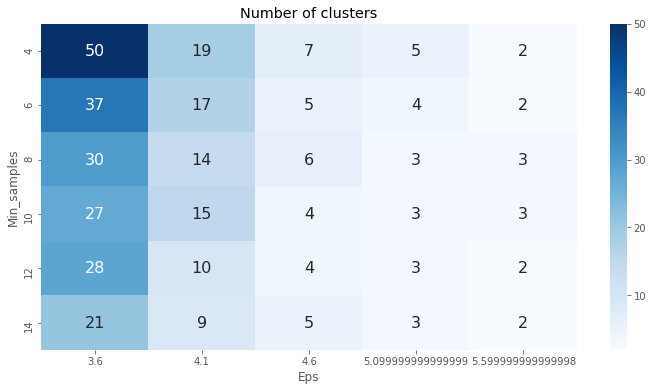

In [14]:
#Show clustering matrix with number of clusters, eps and min_samples (x,y).
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="Blues", ax=ax)
ax.set_title('Number of clusters')
plt.show()

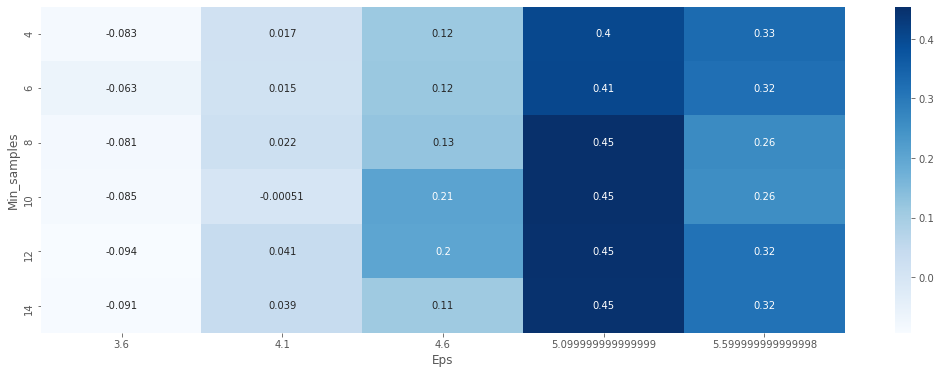

In [15]:
#Show clustering matrix with silhoutte score, eps and min_samples (x,y).
#Silhouette score indicates how well clusters are separates. Range is -1..1. 1 is the best score.
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="Blues", ax=ax)
plt.show()

In [16]:
#Final clustering with most optimal eps and min_samples parameters.
print('PCU utilization:', psutil.cpu_percent(),'%')
start = time.time()

DBS_clustering = DBSCAN(eps=4.5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(DBS_clustering.labels_, dtype=bool)
core_samples_mask[DBS_clustering.core_sample_indices_] = True
labels = DBS_clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
DBSCAN_clustered = pd.DataFrame(X.copy())
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

end = time.time()
print('PCU utilization:', psutil.cpu_percent(),'%')
print('Total time: %0.2f'%(end-start),'s')

PCU utilization: 25.6 %
PCU utilization: 31.9 %
Total time: 79.68 s


In [17]:
#Check number of clusters and amount of samples in each.
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,499
0,3850
1,2970
2,33


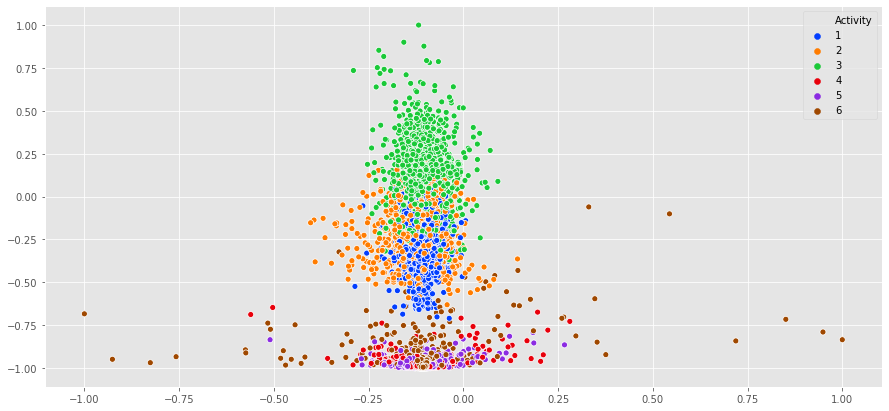

In [18]:
#Plot the original cluster assignments using given cluster assignments.
sns.scatterplot(X[:,2], X[:,3], hue=train_data["Activity"], palette="bright")

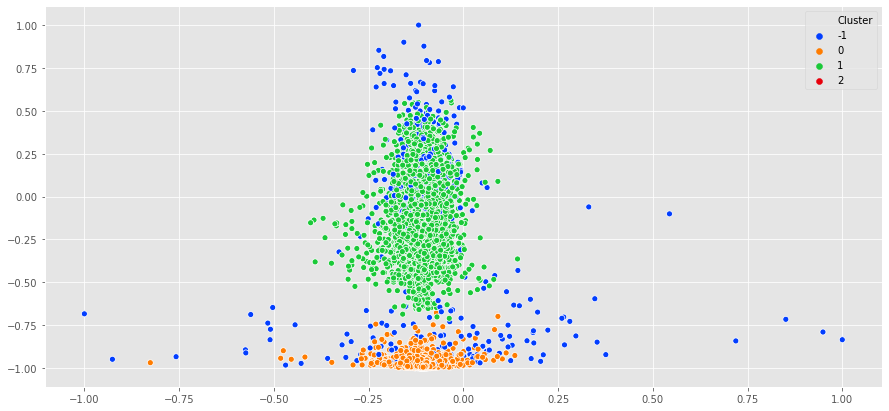

In [19]:
#Plot DBSCAN predicted clusters. Label '-1' is outliers. Only two clusters identified.
sns.scatterplot(X[:,2], X[:,3], DBSCAN_clustered['Cluster'], palette="bright")

In [20]:
#Print the DBSCAN KPIs.
label_opt = np.array(np.reshape(label,-1))
label_opt = np.array(np.reshape(label_opt,-1))
label_opt
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(label_opt, labels))
print("Completeness: %0.3f" % metrics.completeness_score(label_opt, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(label_opt, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(label_opt, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(label_opt, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 499
Homogeneity: 0.383
Completeness: 0.749
V-measure: 0.507
Adjusted Rand Index: 0.325
Adjusted Mutual Information: 0.507
Silhouette Coefficient: 0.197


<h3>Dimensionality reduction with LDA.

In [21]:
#Dimensionality reduction. Also called data extraction.
#Transform data to four components. This covers 99% of the variance. See variance ratio below.
lda = LDA(n_components=4)
X_train = lda.fit_transform(X, label)
#X_train = lda.fit(X, label).transform(X)

C:\Users\marpulli\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
#Check how much variance is covered with each component. With four 99%.
lda.explained_variance_ratio_

array([0.73276802, 0.17514607, 0.05460691, 0.02842483])

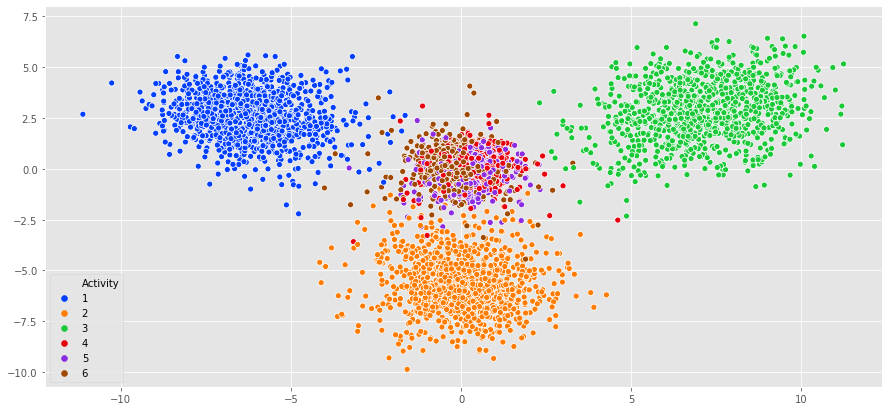

In [23]:
#Plot the data after dimensionality reduction with LDA. Also called data extraction.
sns.scatterplot(X_train[:,2], X_train[:,3], hue=train_data['Activity'], palette='bright')

In [24]:
#Create nearest neighbor distances.
X_data = X_train #No scaling
neigh = NearestNeighbors(n_neighbors=4)#was 4 on best
nbrs = neigh.fit(X_data)
distances, indices = nbrs.kneighbors(X_data)

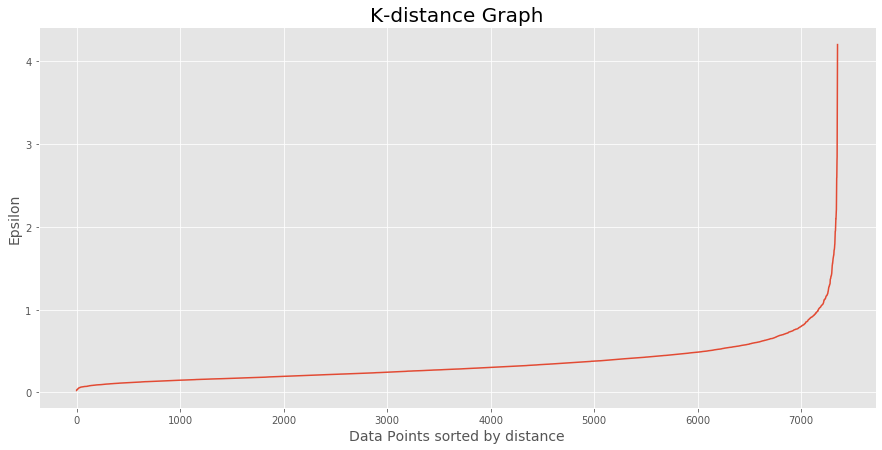

In [25]:
# Plotting K-distance graph to find best DBSCAN eps value.
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [26]:
#Set range of values using above graph. This to fond optimal DBSCAN parameters
eps_values = np.arange(0.9,1.9,0.1) # no scaling + LDA
min_samples = np.arange(4,18,2) # no scaling +LDA 4...18
DBSCAN_params = list(product(eps_values, min_samples))

In [27]:
#Run DBSCAN fit with multiple parameter sets to find optimal parameters for best most accurate output.
#Run timer to check computation time.
no_of_clusters = []
sil_score = []
print('PCU utilization:', psutil.cpu_percent(),'%')
print('Clusters created at each round. Looking for 6 with high silhouette score. This will take about 200s to run')
start = time.time()

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_data)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    #print(DBS_clustering.labels_)
    #print(no_of_clusters[-1])
    #print(p[0],p[1])
    #print('PCU utilization%:', psutil.cpu_percent())
    if len(np.unique(DBS_clustering.labels_)) > 1:
        sil_score.append(silhouette_score(X_data, DBS_clustering.labels_))
        good_label = DBS_clustering.labels_
    else:
        sil_score.append(silhouette_score(X_data, good_label))
        
end = time.time()
print('PCU utilization:', psutil.cpu_percent(),'%')
print('Total time: %0.2f'%(end-start),'s')

PCU utilization: 30.7 %
Clusters created at each round. Looking for 6 with high silhouette score. This will take about 200s to run
PCU utilization: 49.0 %
Total time: 125.71 s


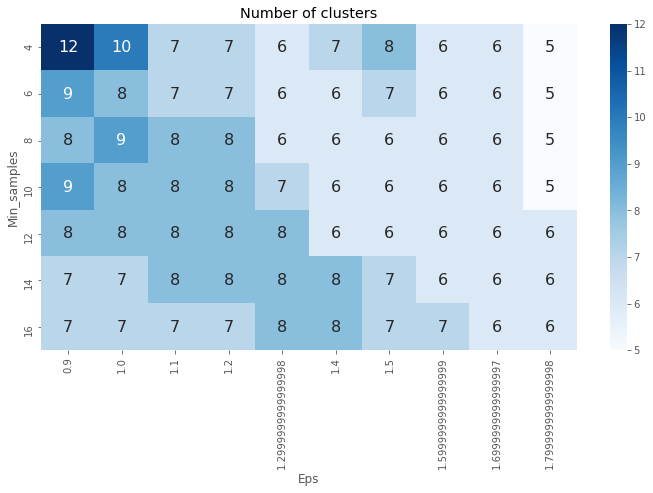

In [28]:
#Show clustering matrix with number of clusters, eps and min_samples (x,y). 
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="Blues", ax=ax)
ax.set_title('Number of clusters')
plt.show()

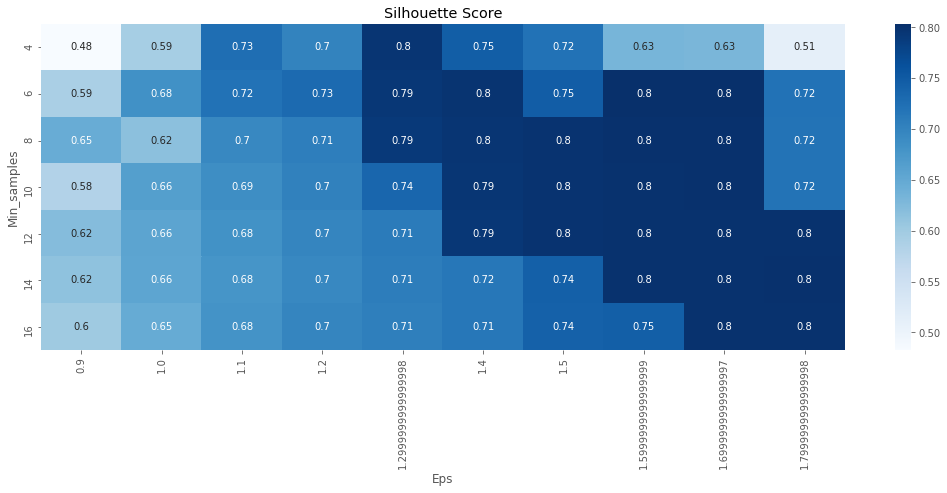

In [29]:
##Show clustering matrix with silhoutte score, eps and min_samples (x,y).
#Silhouette score indicates how well clusters are separates. Range is -1..1. 1 is the best score.
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="Blues", ax=ax)
ax.set_title('Silhouette Score')
plt.show()

In [30]:
#Final clustering with most optimal eps and min_samples parameters selected from the above.
print('PCU utilization:', psutil.cpu_percent(),'%')
start = time.time()

DBS_clustering = DBSCAN(eps=1.6, min_samples=10).fit(X_data)#1.6&10
core_samples_mask = np.zeros_like(DBS_clustering.labels_, dtype=bool)
core_samples_mask[DBS_clustering.core_sample_indices_] = True
labels = DBS_clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
DBSCAN_clustered = pd.DataFrame(X_data.copy())
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

end = time.time()
print('PCU utilization:', psutil.cpu_percent(),'%')
print('Total time: %0.2f'%(end-start),'s')

PCU utilization: 15.8 %
PCU utilization: 42.0 %
Total time: 0.39 s


In [31]:
#Check number of clusters and amount of samples in each.
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,79
0,2644
1,1377
2,1216
3,972
4,1064


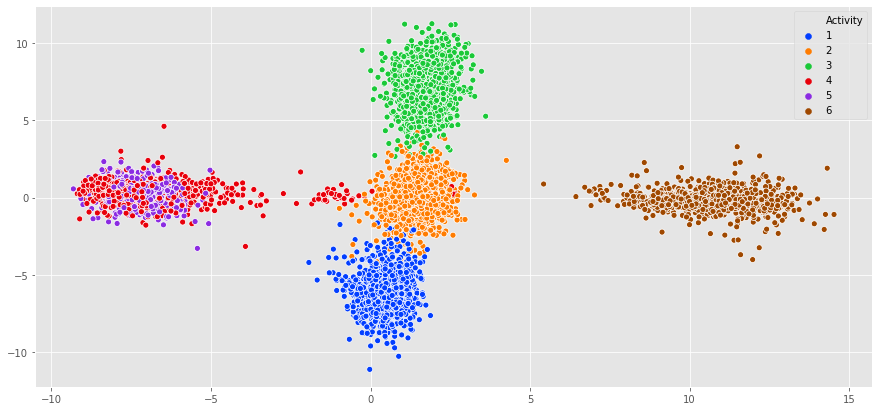

In [32]:
#Plot the original cluster assignments using given cluster assignments.
sns.scatterplot(X_data[:,1], X_data[:,2], hue=train_data["Activity"], palette="bright")

In [ ]:
#Remove outliers if needed
#DBSCAN_clustered.drop(DBSCAN_clustered[DBSCAN_clustered['Cluster'] < 0].index, inplace = True) 

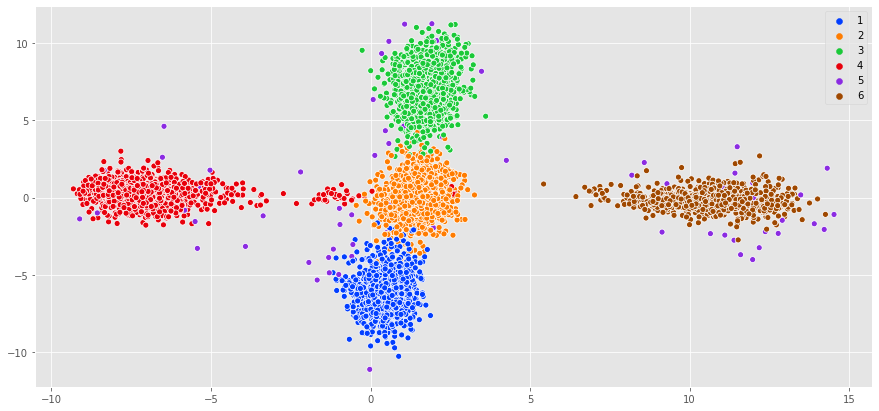

In [33]:
#Plot DBSCAN predicted clusters. Label '5' is outliers. Sitting and standing in same cluster combined.
#Match the colors with original.
DBSCAN_clustered['Cluster'] = DBSCAN_clustered['Cluster'] + 10
#Relabeling to match input data
data_labels = DBSCAN_clustered.Cluster.values
data_labels[data_labels == 10] = 4
data_labels[data_labels == 11] = 6
data_labels[data_labels == 12] = 1
data_labels[data_labels == 13] = 3
data_labels[data_labels == 14] = 2
data_labels[data_labels == 9] = 5
sns.scatterplot(X_data[:,1], X_data[:,2], data_labels, palette="bright")

<h3>DBSCAN KPI creation.

In [34]:
#Print the DBSCAN KPIs.
#Reshape original label arrays to match DBSCAN labeling
label_opt = np.array(np.reshape(label,-1))
label_opt = np.array(np.reshape(label_opt,-1))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(label_opt, labels))
print("Completeness: %0.3f" % metrics.completeness_score(label_opt, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(label_opt, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(label_opt, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(label_opt, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_data, labels))

Estimated number of clusters: 5
Estimated number of noise points: 79
Homogeneity: 0.850
Completeness: 0.963
V-measure: 0.903
Adjusted Rand Index: 0.788
Adjusted Mutual Information: 0.903
Silhouette Coefficient: 0.801


<h3> Netork Layout

In [36]:
DBS_clustering.get_params(deep=True)

{'algorithm': 'auto',
 'eps': 1.6,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 10,
 'n_jobs': None,
 'p': None}

<h3>Use test data to verify model performance.

In [37]:
#Read the data. 'train_data includes features and label.'
test_data = pd.read_csv("Test_Dataset.csv")
X = np.array(pd.read_csv("X_test.csv", header=None))
label = pd.read_csv("y_test.csv", header=None)

C:\Users\marpulli\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


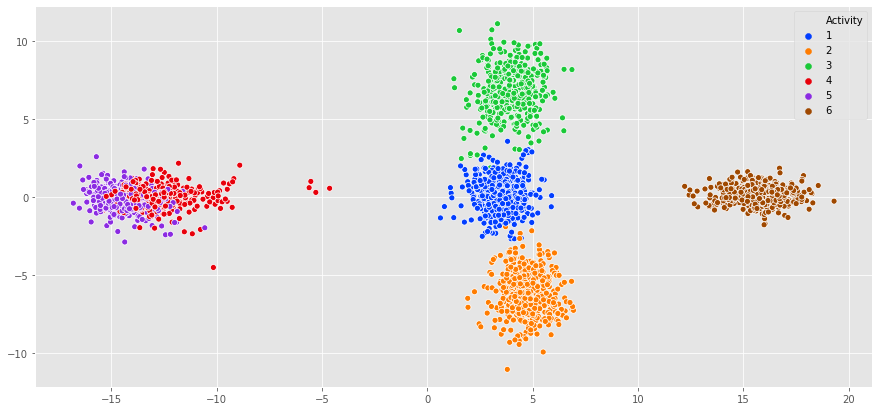

In [38]:
lda = LDA(n_components=4)
X_test = lda.fit_transform(X, label)
sns.scatterplot(X_test[:,1], X_test[:,3], hue=test_data['Activity'], palette='bright')

In [39]:
#Final clustering with most optimal eps and min_samples parameters selected from the above.
X_data = X_test #No scaling
DBS_clustering = DBSCAN(eps=1.6, min_samples=10).fit(X_data)#0.3&6
core_samples_mask = np.zeros_like(DBS_clustering.labels_, dtype=bool)
core_samples_mask[DBS_clustering.core_sample_indices_] = True
labels = DBS_clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
DBSCAN_clustered = pd.DataFrame(X_data.copy())
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [40]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,61
0,1001
1,534
2,487
3,400
4,464


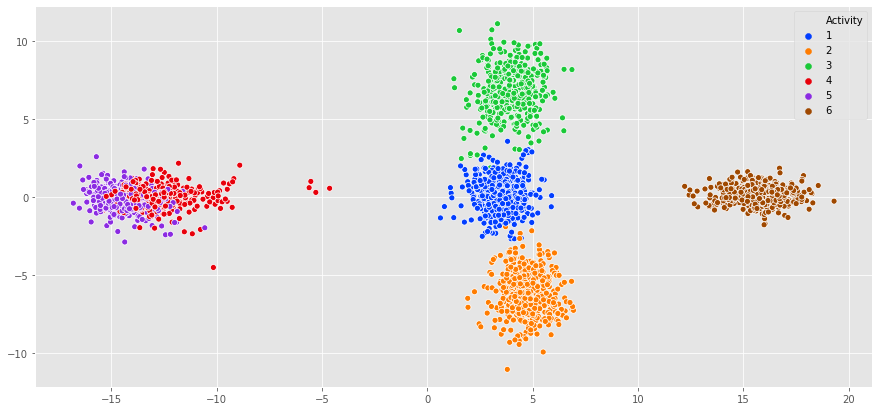

In [41]:
#Plot DBSCAN output with original cluster labeling.
sns.scatterplot(X_data[:,1], X_data[:,3], hue=test_data["Activity"], palette="bright")

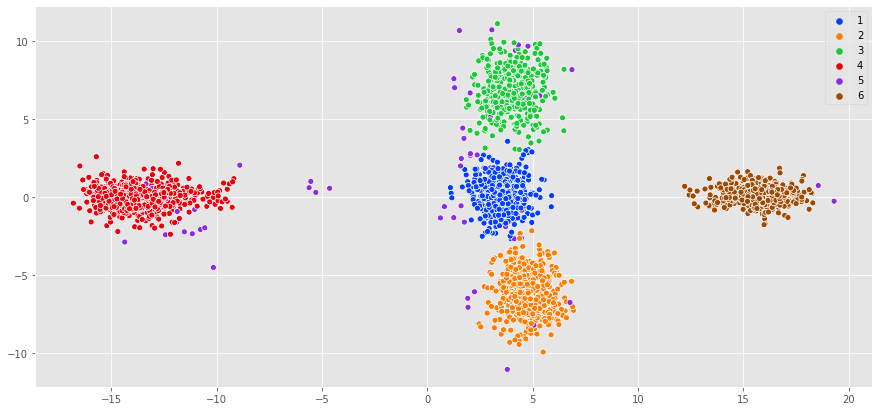

In [42]:
#Plot DBSCAN predicted clusters. Label '5' is outliers. Sitting and standing in same cluster combined.
#Match the colors with original.
DBSCAN_clustered['Cluster'] = DBSCAN_clustered['Cluster'] + 10
#Relabeling to match input data
data_labels = DBSCAN_clustered.Cluster.values
data_labels[data_labels == 10] = 4
data_labels[data_labels == 11] = 6
data_labels[data_labels == 12] = 1
data_labels[data_labels == 13] = 3
data_labels[data_labels == 14] = 2
data_labels[data_labels == 9] = 5
sns.scatterplot(X_data[:,1], X_data[:,3], data_labels, palette="bright")

In [43]:
#Reshape original label arrays to match DBSCAN labeling
label_opt = np.array(np.reshape(label,-1))
label_opt = np.array(np.reshape(label_opt,-1))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(label_opt, labels))
print("Completeness: %0.3f" % metrics.completeness_score(label_opt, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(label_opt, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(label_opt, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(label_opt, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_data, labels))

Estimated number of clusters: 5
Estimated number of noise points: 61
Homogeneity: 0.849
Completeness: 0.940
V-measure: 0.892
Adjusted Rand Index: 0.794
Adjusted Mutual Information: 0.892
Silhouette Coefficient: 0.825


<h3>LDA & kPCA

In [47]:
kpca = KernelPCA(n_components=3, 
                 kernel="rbf", 
                 fit_inverse_transform=True, 
                 gamma=0.005, 
                 eigen_solver='arpack',
                 tol=2,
                 max_iter=5,
                 random_state=12)
X_kpca = kpca.fit_transform(X_data)
#X_back = kpca.inverse_transform(X_kpca)
#pca = PCA()
#X_dataplot = kpca.fit_transform(X)

In [48]:
#Component variance
explained_variance = np.var(X_kpca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
explained_variance_ratio

array([0.5011742 , 0.32286922, 0.17595657])

In [49]:
X_data = X_kpca
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(X_data)
distances, indices = nbrs.kneighbors(X_data)

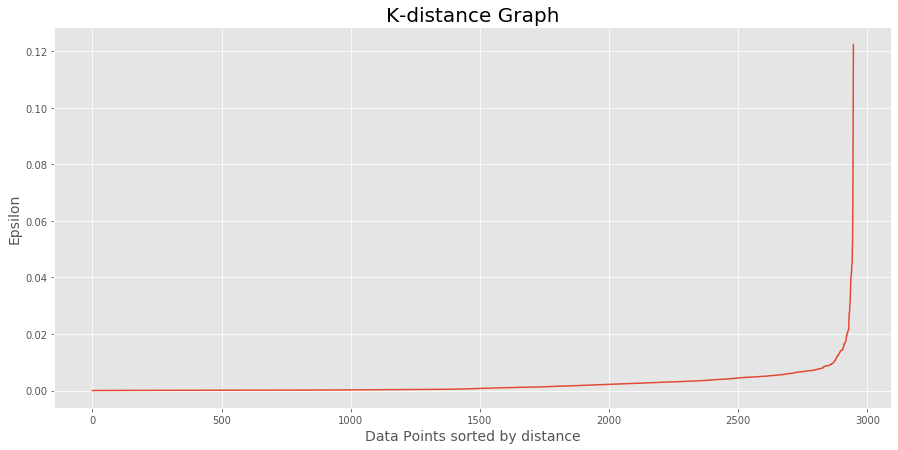

In [50]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [51]:
eps_values = np.arange(0.005,0.035,0.005) #kPCA
min_samples = np.arange(4,16,2) #kPCA
DBSCAN_params = list(product(eps_values, min_samples))

In [52]:
#Clustering
no_of_clusters = []
sil_score = []
for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_data)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    #print(DBS_clustering.labels_)
    print(no_of_clusters[-1])
    #print(p[0],p[1])
    if len(np.unique(DBS_clustering.labels_)) > 1:
        sil_score.append(silhouette_score(X_data, DBS_clustering.labels_))
        good_label = DBS_clustering.labels_
    else:
        sil_score.append(silhouette_score(X_data, good_label))  

61
26
12
7
8
8
17
9
14
11
14
12
6
7
7
6
5
5
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


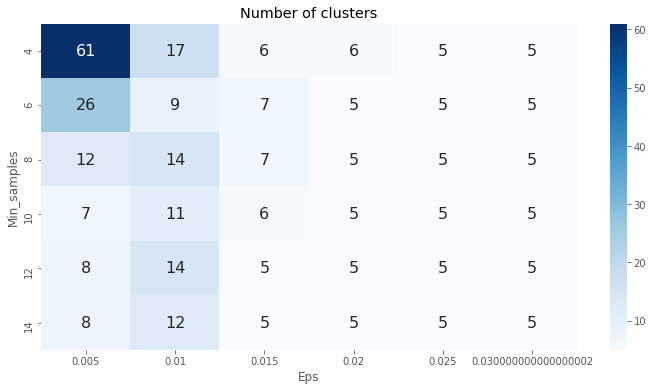

In [53]:
#Show clustering matrix with number of clusters, eps and min_samples (x,y). 
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="Blues", ax=ax)
ax.set_title('Number of clusters')
plt.show()

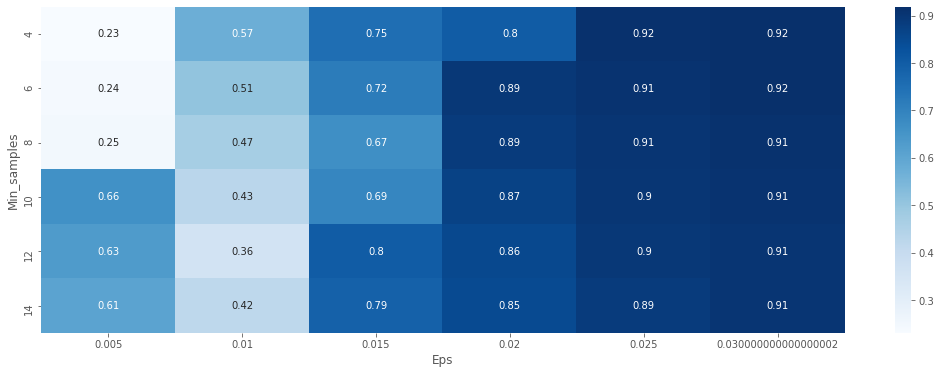

In [54]:
#Show clustering matrix with silhoutte score, eps and min_samples (x,y).
#Silhouette score indicates how well clusters are separates. Range is -1..1. 1 is the best score.
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="Blues", ax=ax)
plt.show()

In [55]:
#Final clustering with most optimal eps and min_samples parameters selected from the above.
DBS_clustering = DBSCAN(eps=0.025, min_samples=12).fit(X_data)#0.3&6
core_samples_mask = np.zeros_like(DBS_clustering.labels_, dtype=bool)
core_samples_mask[DBS_clustering.core_sample_indices_] = True
labels = DBS_clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
DBSCAN_clustered = pd.DataFrame(X_data.copy())
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [56]:
#As seen from the table even silhouette score is higher than LDA only. LDA+kPCA can only separate four clusters.
#LDA-only works better.
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,48
0,1016
1,536
2,483
3,864


In [57]:
#Print DBSCAN performance KPIs.
#Reshape original label arrays to match DBSCAN labeling
label_opt = np.array(np.reshape(label,-1))
label_opt = np.array(np.reshape(label_opt,-1))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(label_opt, labels))
print("Completeness: %0.3f" % metrics.completeness_score(label_opt, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(label_opt, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(label_opt, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(label_opt, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_data, labels))

Estimated number of clusters: 4
Estimated number of noise points: 48
Homogeneity: 0.740
Completeness: 0.945
V-measure: 0.830
Adjusted Rand Index: 0.688
Adjusted Mutual Information: 0.830
Silhouette Coefficient: 0.896
